In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate two classes of random points in a 2d plane
num_samples_per_class = 1000
# This will be the firset set of points with a, so the cluster of points
# will look similar for these two classes, but with different mean
negative_samples = np.random.multivariate_normal(
  mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)

positive_samples = np.random.multivariate_normal(
  mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)

# make the 2 arrays into a single array
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

# Create the target labels for the two classes
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
  np.ones((num_samples_per_class, 1), dtype="float32")))

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

Loss at step 0: 4.1446


2024-09-09 21:22:52.658107: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-09-09 21:22:52.658127: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-09-09 21:22:52.658132: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-09-09 21:22:52.658304: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-09 21:22:52.658317: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


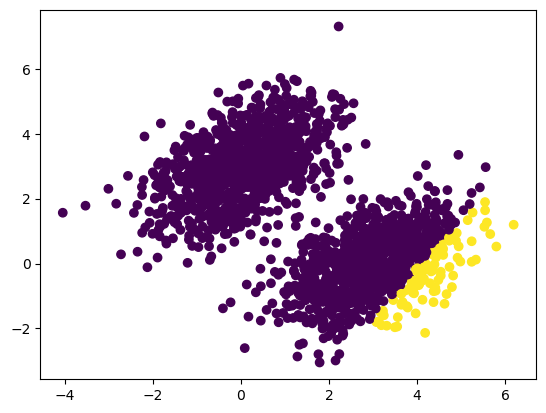

Loss at step 1: 0.4744


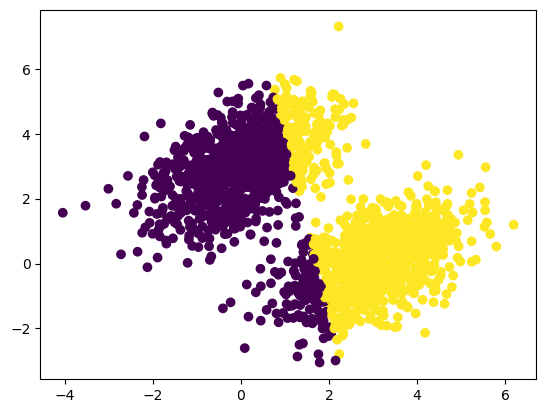

Loss at step 2: 0.1730


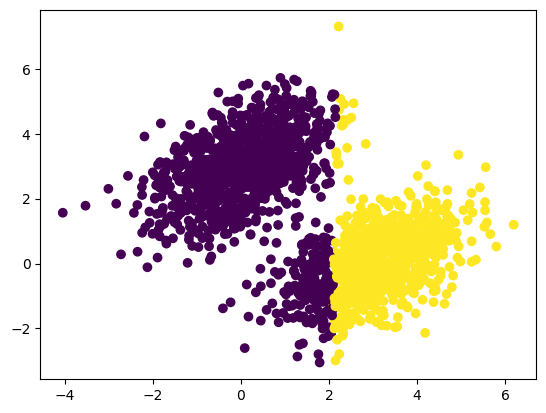

Loss at step 3: 0.1321


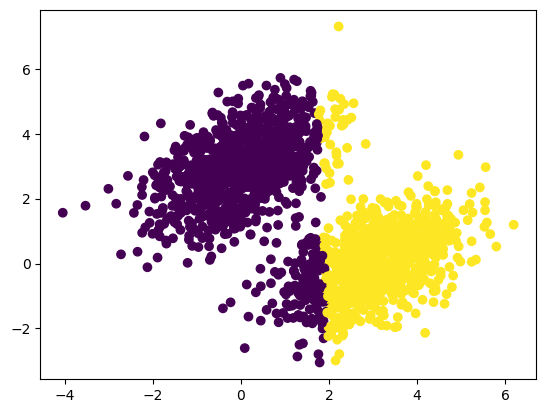

Loss at step 4: 0.1198


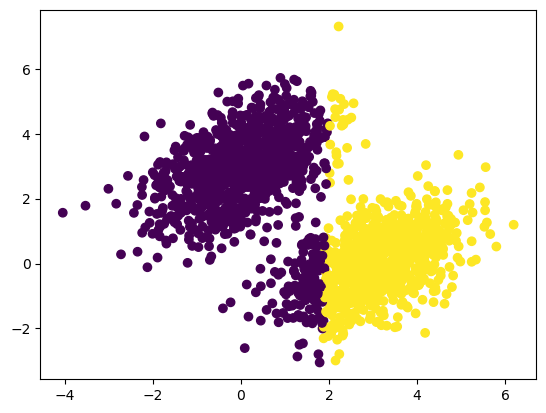

Loss at step 5: 0.1111


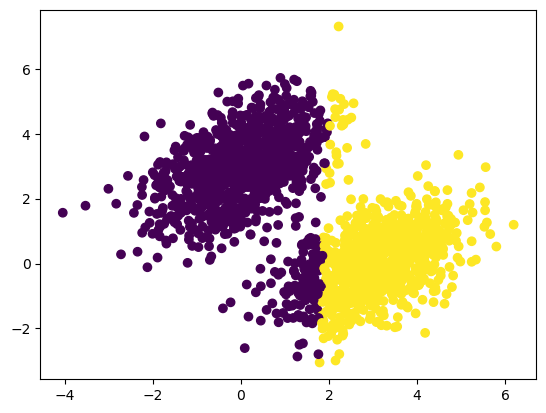

Loss at step 6: 0.1035


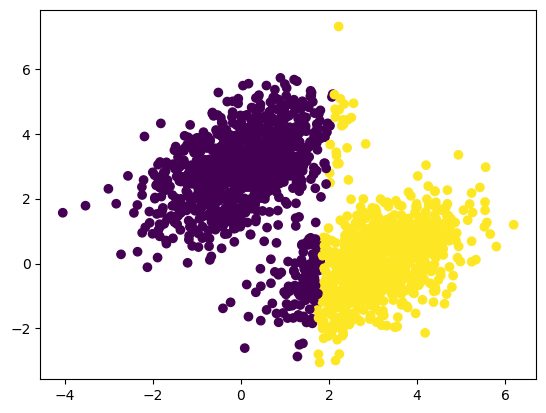

Loss at step 7: 0.0966


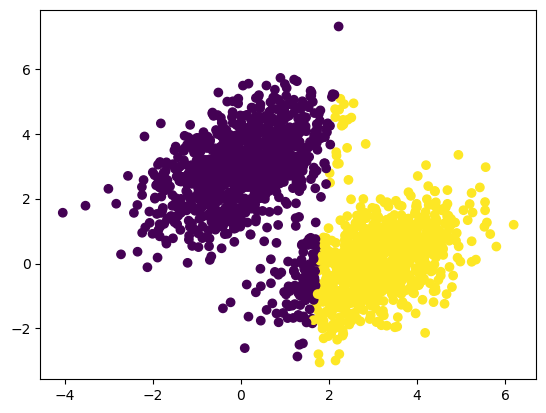

Loss at step 8: 0.0903


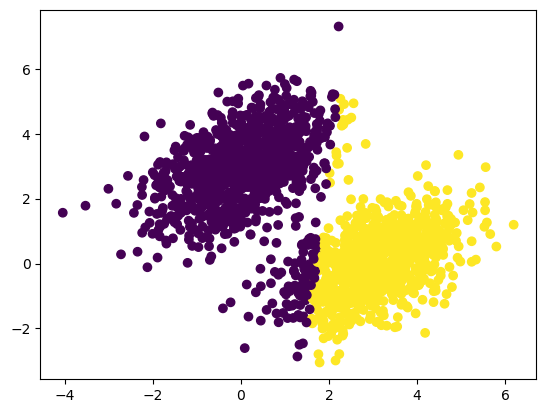

Loss at step 9: 0.0846


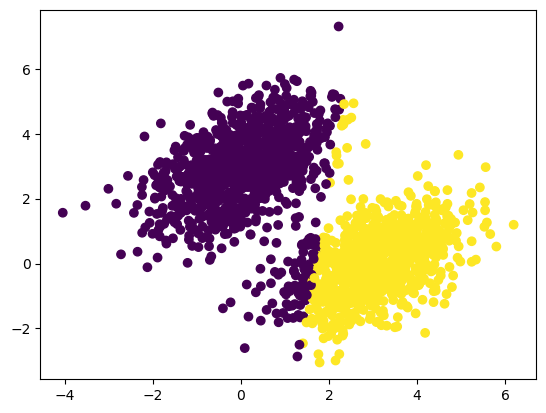

Loss at step 10: 0.0794


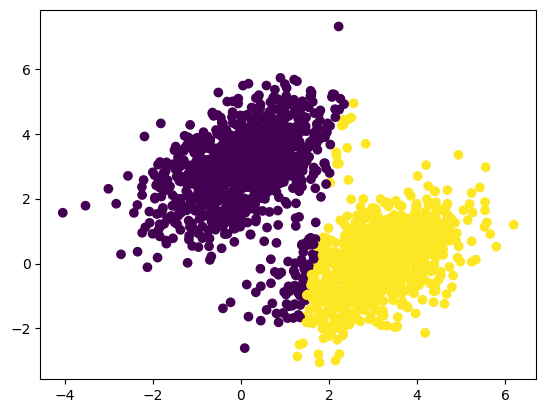

Loss at step 11: 0.0747


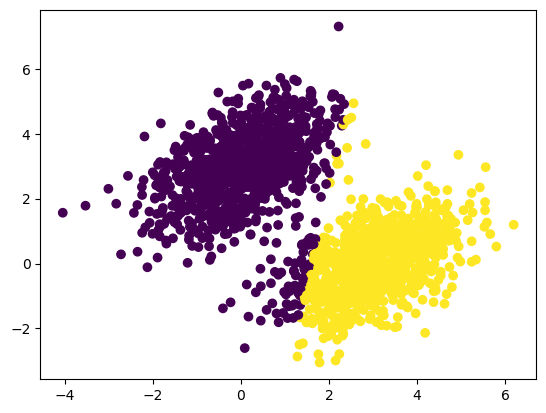

Loss at step 12: 0.0703


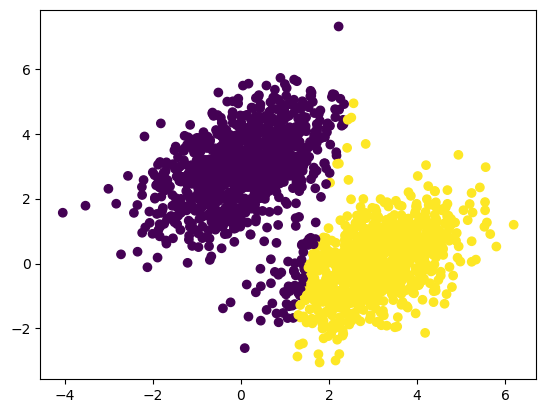

Loss at step 13: 0.0664


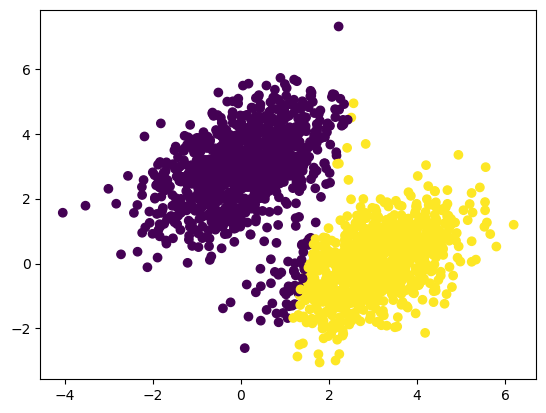

Loss at step 14: 0.0628


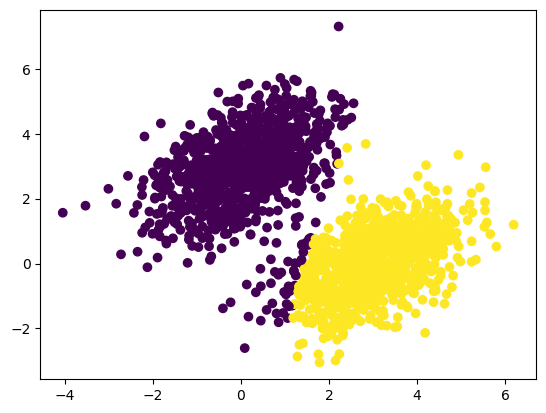

Loss at step 15: 0.0595


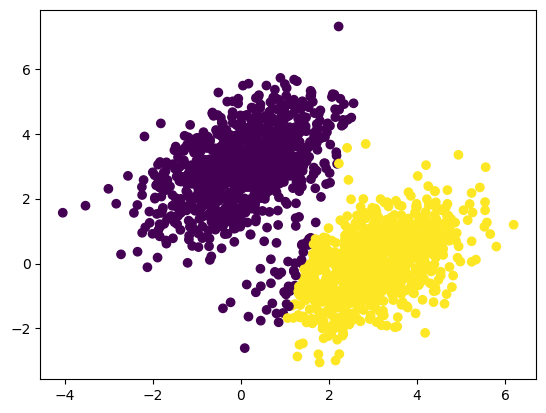

Loss at step 16: 0.0565


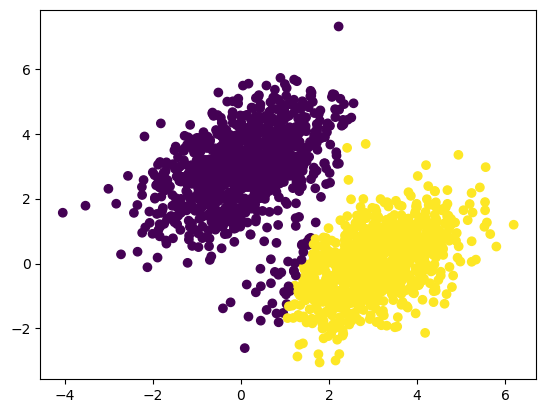

Loss at step 17: 0.0538


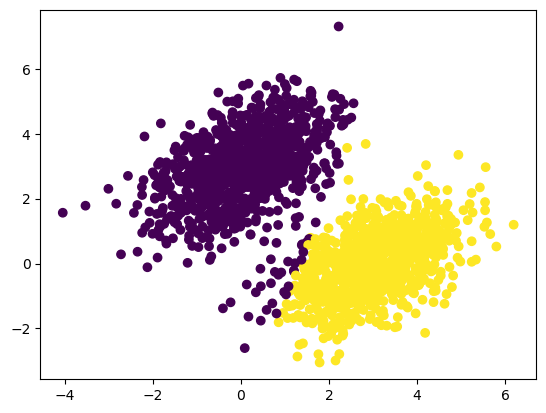

Loss at step 18: 0.0513


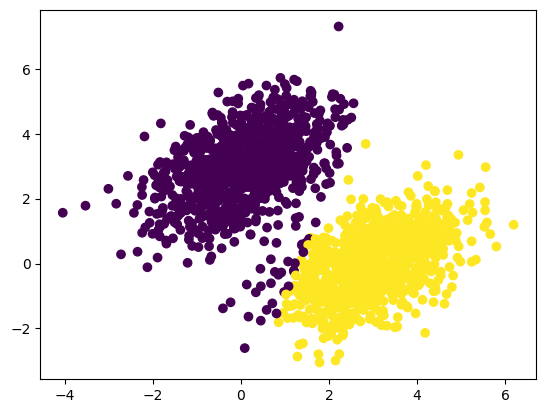

Loss at step 19: 0.0491


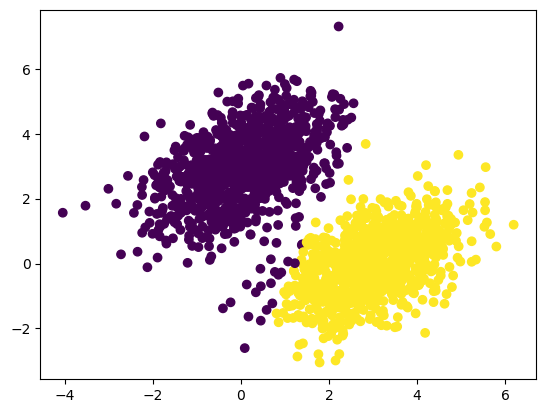

Loss at step 20: 0.0470


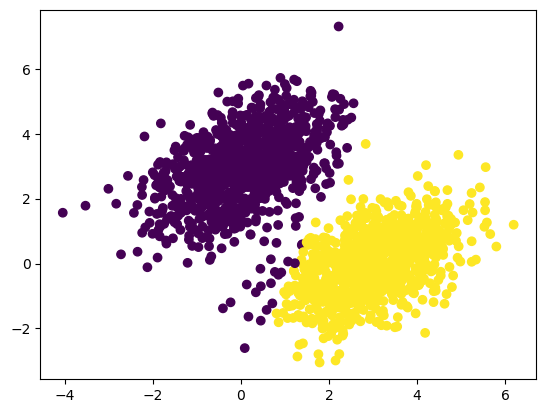

Loss at step 21: 0.0451


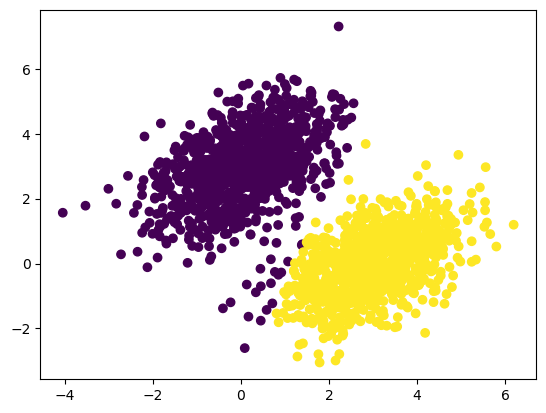

Loss at step 22: 0.0434


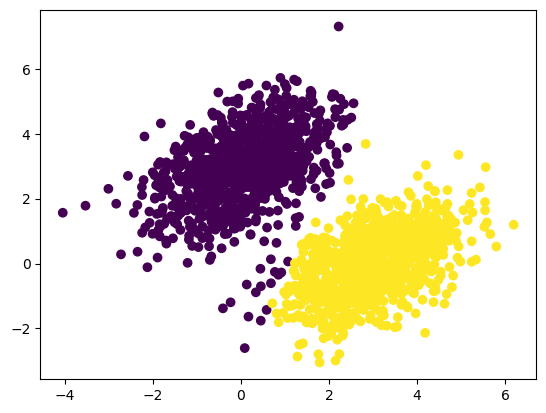

Loss at step 23: 0.0419


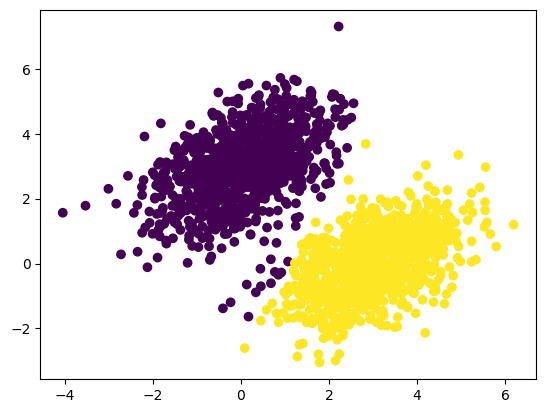

Loss at step 24: 0.0405


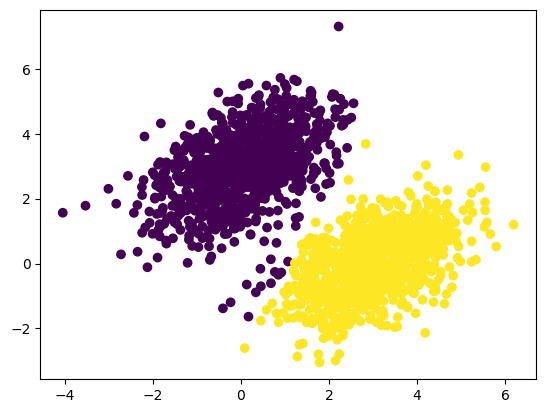

Loss at step 25: 0.0392


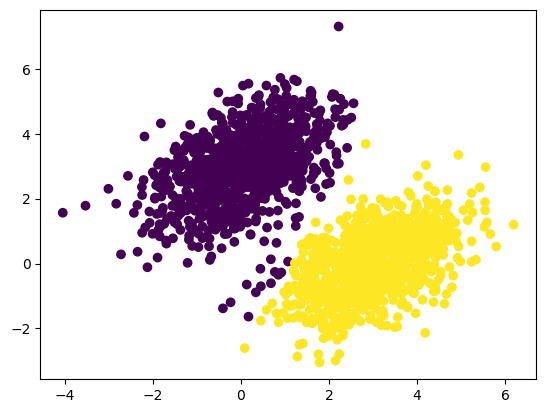

Loss at step 26: 0.0380


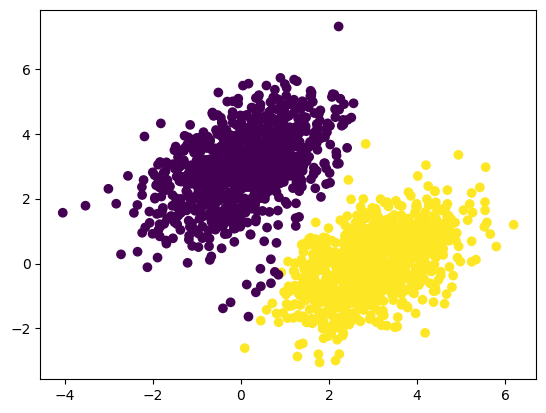

Loss at step 27: 0.0369


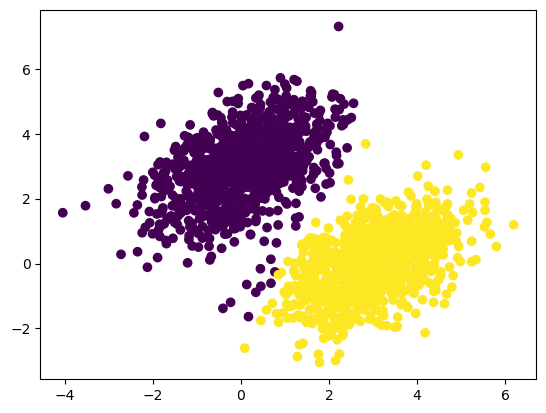

Loss at step 28: 0.0359


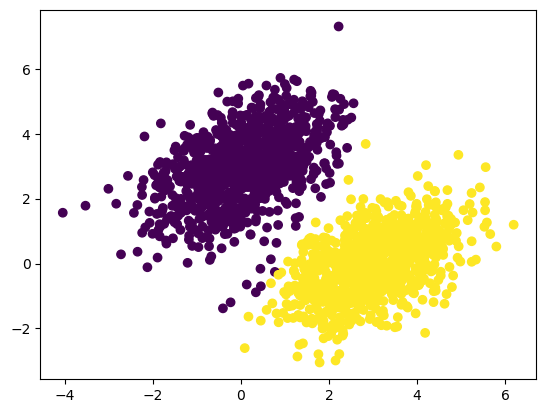

Loss at step 29: 0.0351


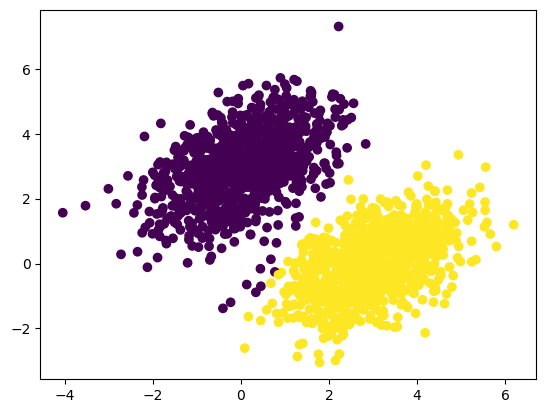

Loss at step 30: 0.0342


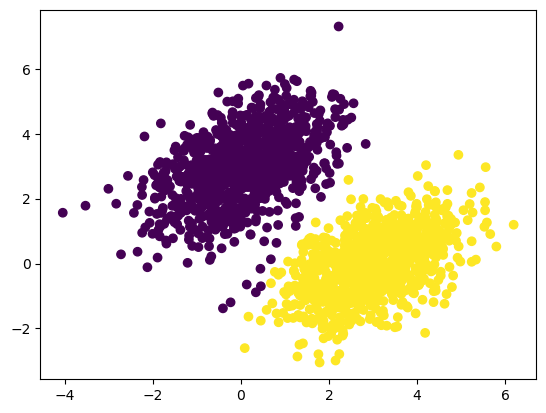

Loss at step 31: 0.0335


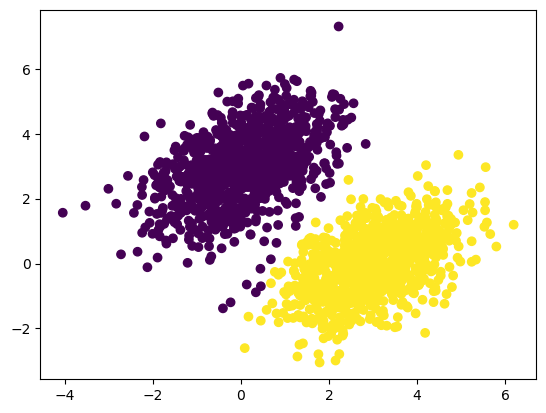

Loss at step 32: 0.0328


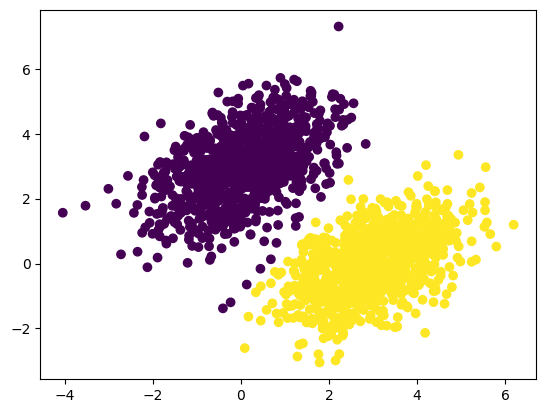

Loss at step 33: 0.0322


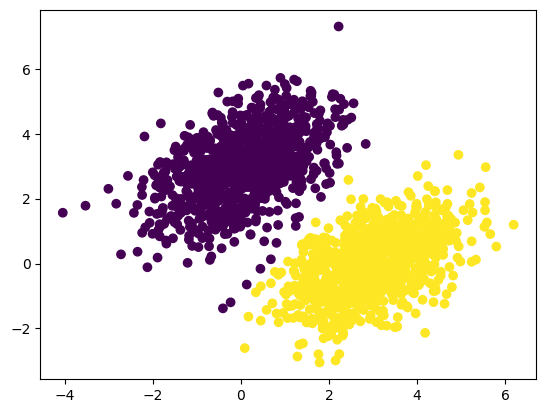

Loss at step 34: 0.0317


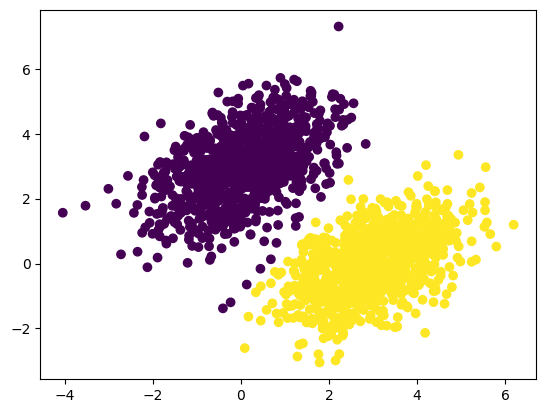

Loss at step 35: 0.0311


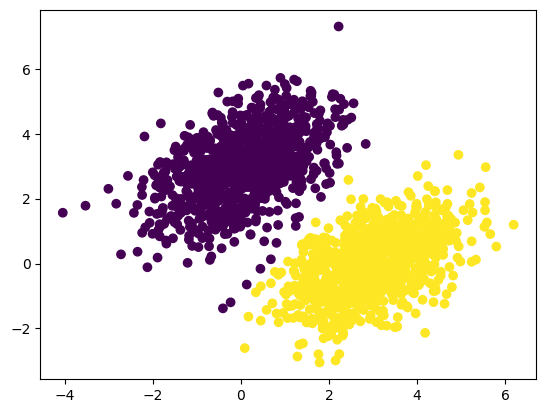

Loss at step 36: 0.0307


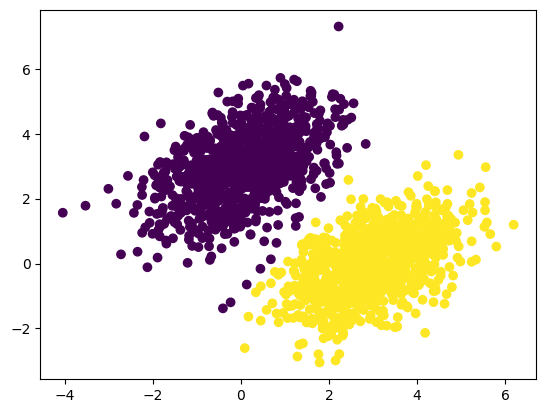

Loss at step 37: 0.0303


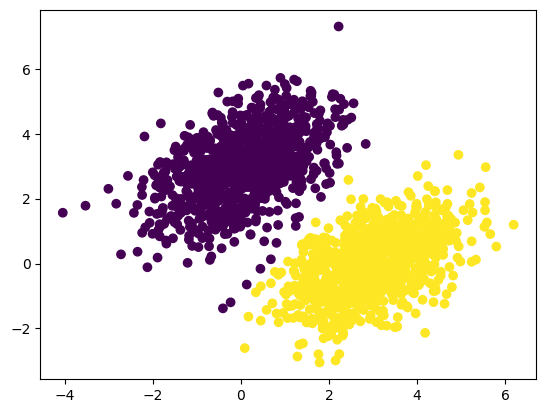

Loss at step 38: 0.0299


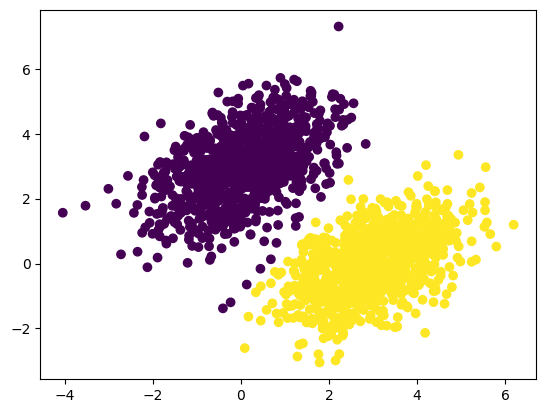

Loss at step 39: 0.0295


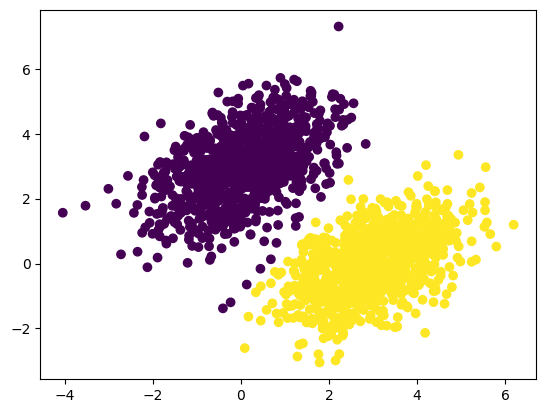

In [2]:
import tensorflow as tf
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

def model(inputs):
  return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_wrt_W, grad_los_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_los_wrt_b * learning_rate)
  return loss

for step in range(40):
  loss = training_step(inputs, targets)
  print('Loss at step %d: %.4f' % (step, loss))

  predictions = model(inputs)
  plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
  plt.show()